# Convolutional Neural Networks (CNN)

# Importar Librerías

In [65]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [67]:
dirname = os.path.join(os.getcwd(),'/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter50 1
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter29 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter47 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter35 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter30 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter27 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter7 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter40 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter28 71
/home/geovanni/Jupython/notebookenv/datasetletrasyCNN/imagenes/caracteres/caracter54 71
/home/geovanni/Jupython/no

# Creación de las etiquetas

In [68]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  4118


In [69]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 caracter50
1 caracter29
2 caracter47
3 caracter35
4 caracter30
5 caracter27
6 caracter7
7 caracter40
8 caracter28
9 caracter54
10 caracter39
11 caracter58
12 caracter57
13 caracter52
14 caracter33
15 caracter6
16 caracter11
17 caracter32
18 caracter45
19 caracter23
20 caracter44
21 caracter41
22 caracter2
23 caracter42
24 caracter46
25 caracter55
26 caracter26
27 caracter21
28 caracter10
29 caracter15
30 caracter12
31 caracter25
32 caracter17
33 caracter22
34 caracter49
35 caracter14
36 caracter24
37 caracter5
38 caracter48
39 caracter31
40 caracter37
41 caracter4
42 caracter51
43 caracter13
44 caracter20
45 caracter19
46 caracter1
47 caracter43
48 caracter38
49 caracter34
50 caracter16
51 caracter8
52 caracter3
53 caracter18
54 caracter56
55 caracter36
56 caracter53
57 caracter9


In [70]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)



# Encuentra los números únicos de las etiquetas de entrenamiento
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  58
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]


# Creación de Sets de Entrenamiento y Test

In [71]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (3294, 50, 50) (3294,)
Testing data shape :  (824, 50, 50) (824,)


Text(0.5, 1.0, 'Ground Truth : 14')

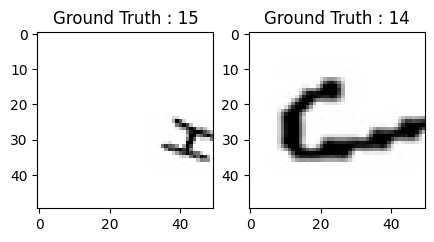

In [72]:
plt.figure(figsize=[5,5])

# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Mostrar la primera imagen en los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamiento las imagenes

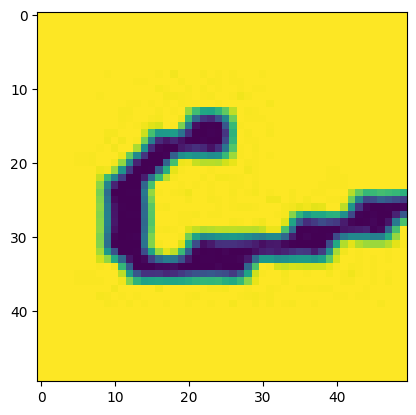

In [73]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

# Se hace el One-hot Encoding para la red

In [74]:
# Cambio de etiquetas categoricas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar cambios
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 15
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Creación del Set de Entrenamiento y Validación

In [75]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [76]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2635, 50, 50) (659, 50, 50) (2635, 58) (659, 58)


# Creación el modelo de CNN

In [77]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-1 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [78]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,1)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [79]:
sport_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                640032    
                                                      

In [80]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamiento del modelo: Aprende a clasificar imágenes

In [83]:
# este paso puede tomar varios minutos, dependiendo del ordenador
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
42/42 [==============================] - 10s 224ms/step - loss: 1.4405 - accuracy: 0.5731 - val_loss: 1.0511 - val_accuracy: 0.7602
Epoch 2/20
42/42 [==============================] - 7s 166ms/step - loss: 1.4031 - accuracy: 0.5822 - val_loss: 1.0575 - val_accuracy: 0.7936
Epoch 3/20
42/42 [==============================] - 9s 216ms/step - loss: 1.3237 - accuracy: 0.5981 - val_loss: 0.9553 - val_accuracy: 0.8088
Epoch 4/20
42/42 [==============================] - 11s 267ms/step - loss: 1.2811 - accuracy: 0.6171 - val_loss: 0.8604 - val_accuracy: 0.8361
Epoch 5/20
42/42 [==============================] - 16s 382ms/step - loss: 1.2056 - accuracy: 0.6395 - val_loss: 0.8098 - val_accuracy: 0.8847
Epoch 6/20
42/42 [==============================] - 13s 322ms/step - loss: 1.1707 - accuracy: 0.6516 - val_loss: 0.7713 - val_accuracy: 0.8483
Epoch 7/20
42/42 [==============================] - 11s 261ms/step - loss: 1.1287 - accuracy: 0.6676 - val_loss: 0.8041 - val_accuracy: 0.8680
E

In [85]:
# se guarda la red para reutilizarla en el futuro sin tener que entrenar de nuevo
sport_model.save("/home/geovanni/Documentos/celulas.h5py")

INFO:tensorflow:Assets written to: /home/geovanni/Documentos/celulas.h5py/assets


INFO:tensorflow:Assets written to: /home/geovanni/Documentos/celulas.h5py/assets


# Evaluación de la red

In [86]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

26/26 [==============================] - 1s 25ms/step - loss: 0.6053 - accuracy: 0.9223


In [87]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6052572727203369
Test accuracy: 0.9223300814628601


In [88]:
sport_train.history

{'loss': [1.4404972791671753,
  1.4031267166137695,
  1.3237196207046509,
  1.2810659408569336,
  1.2056361436843872,
  1.1707007884979248,
  1.128697395324707,
  1.1006132364273071,
  1.0669279098510742,
  1.0139391422271729,
  1.0318657159805298,
  0.9709218740463257,
  0.9275873303413391,
  0.9429292678833008,
  0.9209957122802734,
  0.8645421862602234,
  0.8984949588775635,
  0.8738033771514893,
  0.8305588364601135,
  0.8318204879760742],
 'accuracy': [0.5730550289154053,
  0.5821632146835327,
  0.5981024503707886,
  0.6170778274536133,
  0.6394686698913574,
  0.6516128778457642,
  0.6675521731376648,
  0.6686906814575195,
  0.6823529601097107,
  0.7028462886810303,
  0.6941176652908325,
  0.7100569009780884,
  0.7267552018165588,
  0.7206830978393555,
  0.7271347045898438,
  0.744592010974884,
  0.7328273057937622,
  0.7419354915618896,
  0.7593927979469299,
  0.7628083229064941],
 'val_loss': [1.0511151552200317,
  1.0575073957443237,
  0.9553269147872925,
  0.8603633046150208,


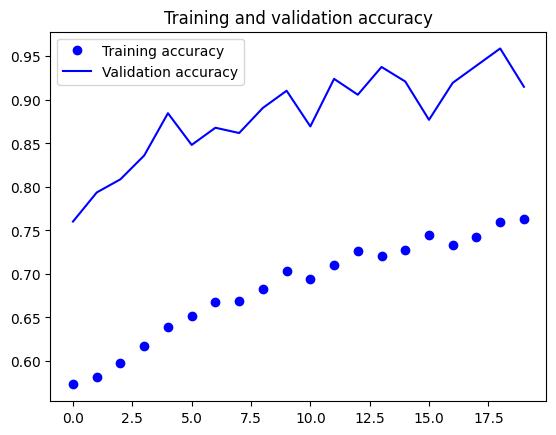

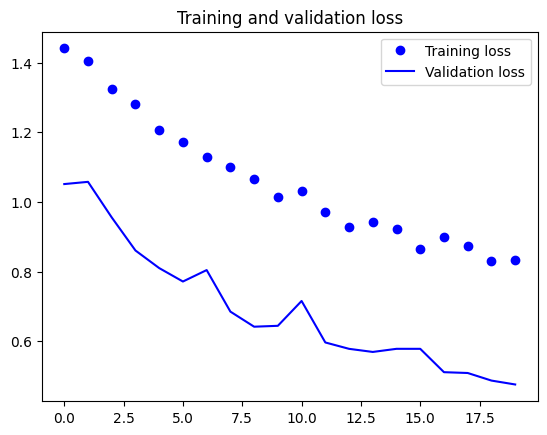

In [89]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
predicted_classes2 = sport_model.predict(test_X)

26/26 [==============================] - 1s 31ms/step


In [91]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [92]:
predicted_classes.shape, test_Y.shape

((824,), (824,))

# Aprendizaje en base a los errores: Qué mejorar?

Found 760 correct labels


/tmp/ipykernel_4856/1908797607.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


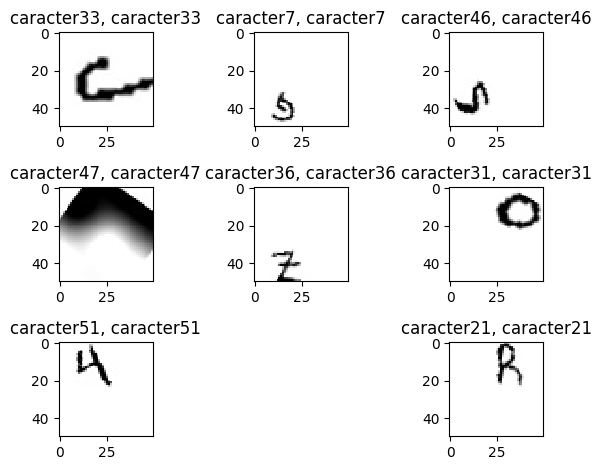

In [93]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,1), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 64 incorrect labels


/tmp/ipykernel_4856/508027561.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


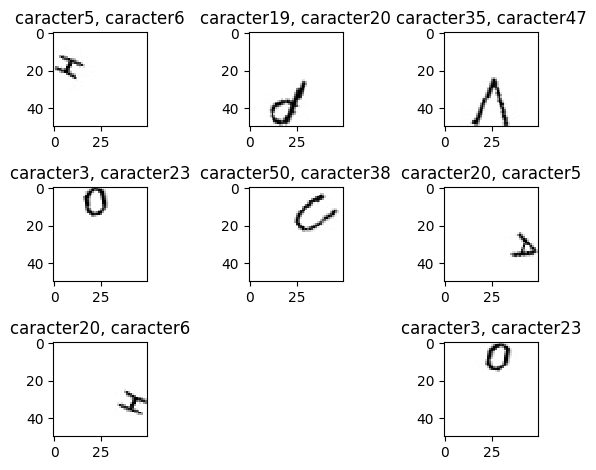

In [94]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,1), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [95]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.93      0.87        14
     Class 1       0.71      0.75      0.73        16
     Class 2       1.00      0.94      0.97        16
     Class 3       0.92      1.00      0.96        12
     Class 4       1.00      1.00      1.00        11
     Class 5       1.00      1.00      1.00        11
     Class 6       1.00      1.00      1.00        15
     Class 7       0.92      1.00      0.96        11
     Class 8       0.94      0.89      0.91        18
     Class 9       1.00      1.00      1.00        17
    Class 10       1.00      1.00      1.00        13
    Class 11       1.00      0.93      0.96        14
    Class 12       0.94      1.00      0.97        16
    Class 13       1.00      0.93      0.97        15
    Class 14       0.92      1.00      0.96        12
    Class 15       1.00      0.14      0.25        14
    Class 16       0.92      1.00      0.96        11
    Class 17       1.00    